# MPHY0041 - CW1 - Notebook 2023/24

In [17]:
#import several libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

## Exercise 1: Decision Boundaries

### a) Compute means and standard deviations for DaT scan in the right putamen (DATSCAN_PUTAMEN_R) for the ‘HC’ and the ‘Parkinsons’ group

In [18]:
#import the file
dat_scan_file = "PPMI_DATSCAN.csv"
dat_data = pd.read_csv('PPMI_DATSCAN.csv', index_col=False)

#remove "SWEDD" data
data_filtered = dat_data[dat_data.COHORT_DEFINITION != 'SWEDD']

#extract the specific data 
dat_parkinsons = data_filtered[data_filtered['COHORT_DEFINITION'] == "Parkinson's Disease"]
dat_hc = data_filtered[data_filtered['COHORT_DEFINITION'] == 'Healthy Control']

#means
mean_park = dat_parkinsons["DATSCAN_PUTAMEN_R"].mean()
mean_hc = dat_hc["DATSCAN_PUTAMEN_R"].mean()

#standard deviations
sd_total = data_filtered["DATSCAN_PUTAMEN_R"].std()

#printing out all values
print("Mean of the right putamen for Parkinson's group: μ = ", mean_park.round(3))
print("Mean of the right putamen for Healthy controls's group: μ = ", mean_hc.round(3))
print("Standard Deviation of the dataset: σ = ", sd_total.round(3))

#decision boundary computation
decision_boundary = (mean_park + mean_hc)/2
print("Decision Boundary:", decision_boundary)

Mean of the right putamen for Parkinson's group: μ =  0.833
Mean of the right putamen for Healthy controls's group: μ =  2.157
Standard Deviation of the dataset: σ =  0.691
Decision Boundary: 1.4948489880513902


### b) Train a LinearRegression to separate Healthy control from Parkinson's disease subjects using DaT scan values for the right putamen (DATSCAN_PUTAMEN_R) and MDS UPDRS Part II score (NP2PTOT)

MODEL OUTPUTS
Score: 0.6186213680327166 
Coefficients:  [-0.40254637  0.01416262] 
Intercept:  1.165998338237147

Decision Boundary: - ( 1.166 + -0.403 * x - 0.5 )/ 0.014


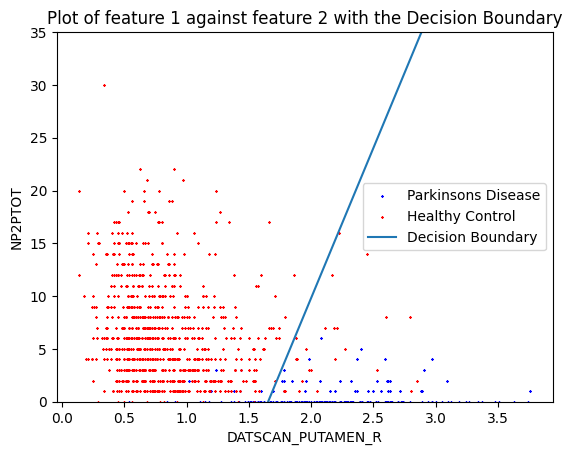

In [104]:
from sklearn.linear_model import LinearRegression

# PREPARE DATA
y = data_filtered['COHORT_DEFINITION'].apply(lambda x:0 if x == 'Healthy Control' else 1) # Binarise diagnosis e.g. HC = 1, PD = 0
X = data_filtered[['DATSCAN_PUTAMEN_R','NP2PTOT']].values # Extract the two features into one variable 

# TRAINING SECTIONS
reg = LinearRegression().fit(X, y)
reg.score(X, y)
coef = reg.coef_
intercept = reg.intercept_

# JUST PRINTING MODEL OUTPUTS
print('MODEL OUTPUTS')
print('Score:',reg.score(X, y),'\nCoefficients: ',reg.coef_,'\nIntercept: ',reg.intercept_)

# SCATTER PLOT OF THE TWO FEATURES
PD_data = X[y == 0]
HC_data = X[y == 1]

plt.scatter(PD_data[:, 0], PD_data[:, 1], c='blue', marker='x', s=1, label='Parkinsons Disease')
plt.scatter(HC_data[:, 0], HC_data[:, 1], c='red', marker='x', s=1, label='Healthy Control')

plt.xlabel('DATSCAN_PUTAMEN_R')
plt.ylabel('NP2PTOT')
plt.title('Plot of feature 1 against feature 2 with the Decision Boundary')

# DECISION BOUNDARY CALCULATION
threshold = 0.5 # decision boundary defined for regression model
x_range = np.linspace(min(X[:,0]), max(X[:,0]),100)

y_values = -(intercept + coef[0] * x_range - threshold) / coef[1] # main calculation based on y = beta0 + beta1 * x1 + beta2 * x2

plt.plot(x_range, y_values,label = 'Decision Boundary')
plt.ylim(0,35)
plt.gca().legend(loc = 'best')

# PRINT DECISION BOUNDARY EQUATION
print('\nDecision Boundary: - (', round(intercept,3) ,'+', round(coef[0],3)  ,'* x -', round(threshold,3) ,')/', round(coef[1],3))


## Exercise 2: Regression Implementations

### a) Complete the code for Linear Regression RSS with L2 regularization


In [1]:
#implement ridge regression (linear regression with L2 regularization)
#this function fits Linear Regression with L2 regularization (ridge regression) using Gradient Descent
#inputs are
#y:         continous values
#features:  input feature matrix
#lam:       lambda value for regularization
#eps:       tolerance for the stopping criterion for gradient descent
#rho:       step size in gradient descent
#maxiter: maximum iterations

#function returns the intercept_ (\beta_0) and the coefficients_ (\beta_i)
def fit_RSSl2_GRAD(y, features, lam=0.00, eps=1e-9, rho=1.0, maxiter=10000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas_ = np.zeros(p)
    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions
    yhat =  X @ betas_

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost = 100000

    #as long as the there is a differentce between old and new cost that is larger
    #than the tolerance we update the parameters
    cnt = 0
    while (abs(old_cost - cost) > eps) and (cnt < maxiter):
        cnt += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS SECTION
        betas_ = 5

        #update predictions
        yhat =  X @ betas_

        old_cost = np.copy(cost)
        #recompute cost
        #COMPLETE THIS LINE
        cost = 6

        #reduce learning rate in case the cost increased
        #reset to previous solution
        if cost > old_cost:
            rho /= 2
    return(betas_)

### b) Complete the code for Linear Regression with LogCosh loss via Gradient Descent

In [47]:
#this function fits Linear Regression with LogCosh loss using Gradient Descent
#inputs are
#y:         continous values
#features:  input feature matrix
#eps:       tolerance for the stopping criterion for gradient descent
#rho:       step size in gradient descent
#maxiter: maximum iterations

#this function returns the beta coefficients for a Linear Regression model
#the first entry (betas[0] is the intercept)
def fit_logcosh_GRAD(y, features, eps=1e-9, rho=1.0, maxiter=10000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas_ = np.zeros(p)
    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions
    yhat =  X @ betas_

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost = 100000
    #as long as the there is a differentce between old and new cost that is larger
    #than the tolerance we update the parameters
    cnt = 0
    while (abs(old_cost - cost) > eps) and (cnt < maxiter):
        cnt += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS SECTION
        betas_ = 5

        #update predictions
        yhat =  X @ betas_

        old_cost = np.copy(cost)
        #recompute cost
        #COMPLETE THIS LINE
        cost = 5

        #reduce learning rate in case the cost increased
        #reset to previous solution
        if cost > old_cost:
            rho /= 2
    return(betas_)

### c) Complete the code for linear regression with linear models for mean and standard deviation

* Deriving the Loss function:

* Deriving the gradients:


In [48]:
#this function fits Linear Regression flexible noise component N(mu(x), sigma(x))
#inputs are
#y:         continous values
#features:  input feature matrix
#eps:       tolerance for the stopping criterion for gradient descent
#rho:       step size in gradient descent
#maxiter: maximum iterations

#this function returns the beta coefficients for a Linear Regression model
#the first entry (betas[0] is the intercept)
def fit_norm_GRAD(y, features, eps=1e-9, rho=0.1, maxiter=10000):
    #sample size
    N = features.shape[0]
    #feature dim
    p = features.shape[1] + 1
    #initalize beta with 0s
    betas_ = np.zeros(p)
    thetas_ = np.ones(p)
    #add column of 1 to X
    X = np.c_[np.ones(N),features]
    #compute predictions
    mu_hat =  X @ betas_
    sigma_hat = X @ thetas_

    old_cost = 100000000
    #compute the cost (J) of the current solution
    #COMPLETE THIS LINE
    cost = 10000
    #as long as the there is a differentce between old and new cost that is larger
    #than the tolerance we update the parameters
    cnt = 0
    while (abs(old_cost - cost) > eps) and (cnt < maxiter):
        cnt += 1
        #beta update (one step of the gradient descent)
        #COMPLETE THIS SECTION
        betas_ = 5
        thetas_ = 6

        #update probabilities
        mu_hat =  X @ betas_
        sigma_hat = X @ thetas_

        old_cost = np.copy(cost)
        #recompute cost
        #COMPLETE THIS LINE
        cost = 4

        #reduce learning rate in case the cost increased
        #reset to previous solution
        if cost > old_cost:
            rho /= 2
    return(betas_, thetas_)

## Exercise 3: Suggest improvements to the ML pipeline



1.   
2.  
3.
4.



## Exercise 4: Retinal Fluid Segmentation

In [105]:
import imageio.v3
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import svm
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import image
from skimage.filters import scharr
from skimage.color import rgb2gray


In [106]:
#helper function to read image along with mask
def read_img(pt, iname):
  img_f = os.listdir(pt + "/" + iname + "/images/")[0]
  msk_f = os.listdir(pt + "/" + iname + "/masks/")[0]
  im  = imageio.v3.imread(pt + "/" + iname + "/images/" + img_f)
  msk = imageio.v3.imread(pt + "/" + iname + "/masks/" + msk_f)
  return (im, msk)

In [107]:
train_path = './train/'
vali_path = './vali/'
test_path = './test/'

In [52]:
#this function takes an input image and
#does the manual feature extraction
#currently it simply turns the color image to a gray scale image.
#but you can modify this function to add new features
#e.g., by appling any filters.

#if the variable nchan is sset to True, then the return is just the number of channels

def preprocess_img(img, nchan=False):
    #some examples for pre-processing:

    ##do nothing
    ##copy all three channels
    #res = img

    ##just use the green channel
    #res = img[:,:,1]

    ##single channel gray
    res = rgb2gray(img) * 255

    #note some of the images are bit 'cut off' this sets the white regions to black
    res[res > 250] = 0

    #some examples for possible extensions:
    ##add the red channel
    #res = np.dstack( (res, img[:,:,1]))

    #add some edge filter applied to the green channel
    #res = np.dstack((res, scharr(img[:,:,1]) * 255))

    #NOTE: the skimage library contains useful filters

    #if nchan is True, then just return the number of channels
    #the pre-processing produces
    if nchan:
        try:
            return(res.shape[2])
        except IndexError:
            return(1)
    return (res)

In [53]:
#turn the images into a training dataset
#train_path:    path to the training data
#n_train_patch: number of patches to be extracted per image
#ps :           patch size as integer (e.g., 7 -> 7x7 patches)
#chan:          number of 'channels' the pre_processed image will have

def create_training_set(train_path, n_train_patch, ps, chan, verbose=True):
  if verbose:
    print("Extracting " + str(n_train_patch) + " pataches of size " + str(ps) + "x" + str(ps) + " from each image.")

  #dimension of square patch
  patch_dim = (ps, ps)
  #center of the patch
  patch_cnt = int((ps-1)/2)
  #dimension of the 'flattened' patch

  flat_dim = ps*ps*chan

  #initialize Y and X
  Y = []
  X = np.empty((0,flat_dim))

  train_imgs = os.listdir(train_path)

  for s in np.arange(400):
    if verbose:
      print("Extracting data from subject: " + str(s))

    img_m, msk_x = read_img(train_path, train_imgs[s])

    #binarize the mask
    msk = (msk_x > 0) * 1

    #extract features
    frames = preprocess_img(img_m)
    #add the labels as an additional channel
    frames = np.dstack((frames, msk))

    #sample patches
    patch = image.extract_patches_2d(frames, patch_dim, max_patches=n_train_patch)

    #each patch receives the label of the center value in the 'label' channel
    Y_tmp = patch[:,patch_cnt,patch_cnt,chan] == 1
    #turn patches into a matrix where each row corresponds to all the features
    #of one patch
    X_tmp = np.reshape(patch[:,:,:,0:chan],(n_train_patch,flat_dim))

    #concatenate with Y and X
    Y.extend(Y_tmp)
    X = np.concatenate((X, X_tmp), axis=0)
  return (Y, X)

In [54]:
#this function takes X and Y as input and
#oversamples the target class ('1') with a ratio:1 ratio (default: 200)
#from the overall size of X a sub_sample of 'sample_size' is randomly selected
def sub_sample(X, Y, sample_size=10000, ratio=200):
  #resampling with 200:1 chance
  weights = np.array([1] * len(Y))
  weights[Y] = 200
  weights = weights/np.sum(weights)

  #sample 10000 of the generated patches
  idx = np.random.choice(X.shape[0],sample_size,replace=False, p=np.array(weights))

  Xsub = X[idx,:]
  Ysub = np.array(Y)[idx]

  return Xsub, Ysub, idx

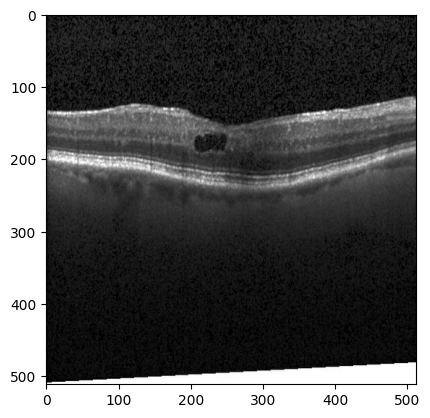

In [55]:
im, msk = read_img(train_path, "10DME_F")
#show the input image
plt.imshow(im)
#obtain the number of channels
chan = preprocess_img(im, True)

### code for parts a) - f)